## Import necessary libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load datasets

In [24]:

customers_df = pd.read_csv("Customers.csv")  # Customer data
transactions_df = pd.read_csv("Transactions.csv")  # Transaction data
products_df = pd.read_csv("Products.csv")  # Product data

###  Preview the data

In [25]:
print("\nCustomers Data:\n")
customers_df.head()  # First 5 rows of Customers data


Customers Data:



,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [26]:
print("\nTransactions Data:\n")
transactions_df.head()  # First 5 rows of Transactions data



Transactions Data:



,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [27]:
print("\nProducts Data:\n")
products_df.head()  # First 5 rows of Products data


Products Data:



,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


### Data Overview

In [28]:
customers_info = customers_df.info()
print("\n")
products_info = products_df.info()
print("\n")
transactions_info = transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  ----

### Check for missing values

In [29]:
missing_values = {
    "Customers": customers_df.isnull().sum(),
    "Products": products_df.isnull().sum(),
    "Transactions": transactions_df.isnull().sum()
}

missing_values

{'Customers': CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 'Products': ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,
 'Transactions': TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64}

### Check for Duplicates values

In [30]:
duplicated_value = {
    "Customers": customers_df.duplicated().sum(),
    "Products": products_df.duplicated().sum(),
    "Transactions": transactions_df.duplicated().sum()
}

duplicated_value

{'Customers': 0, 'Products': 0, 'Transactions': 0}

 **Dataset Information:**

  1. Customers: 200 entries, no missing data.
  2. Products: 100 entries, no missing data. Categories are evenly distributed across Books, Electronics, Clothing, and Home Decor.
  3. Transactions: 1,000 entries, no missing data. Numerical columns (e.g., Quantity, TotalValue) display no anomalies.

## Task 1: Exploratory Data Analysis (EDA) and Business Insights



### Statistics for numerical columns

In [31]:
products_stats = products_df.describe()

products_stats

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [37]:
transactions_stats = transactions_df.describe()

transactions_stats

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


**Key Metrics:**

 1. Products: Price ranges from 16.08 to 497.76, with an average price of ~267.55.  
 
 2. Transactions: Total values range from 16.08 to 1,991.04, with an average of ~689.99.

### Value counts for categorical columns

In [33]:
region_distribution = customers_df["Region"].value_counts()
region_distribution


South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64

### Visualizing region distribution

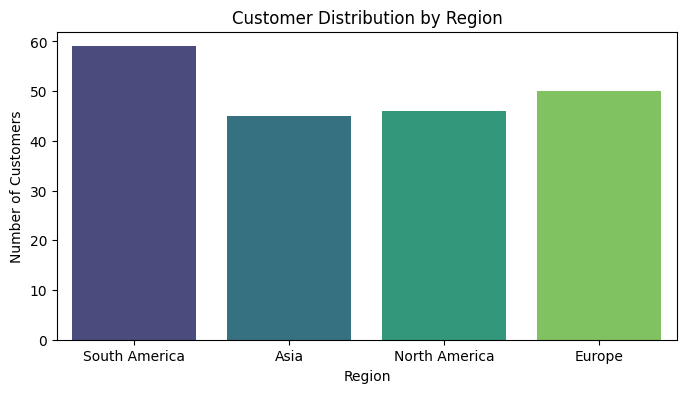

In [14]:
plt.figure(figsize=(8, 4))

sns.countplot(x="Region", data=customers_df, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

**Region Distribution:**

   - South America has the highest number of customers (59), followed by Europe (50), North America (46), and Asia (45).

In [34]:
product_categories = products_df["Category"].value_counts()

product_categories

Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64

### Visualizing product categories

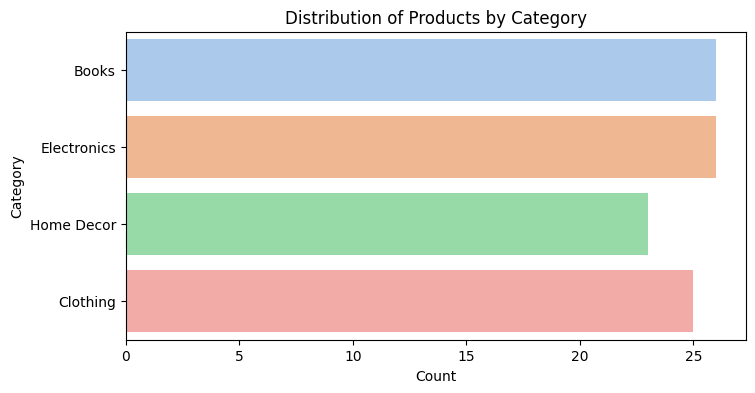

In [15]:
plt.figure(figsize=(8, 4))

sns.countplot(y="Category", data=products_df, palette="pastel")
plt.title("Distribution of Products by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

In [35]:
# Merge transactions with products to get product details
transactions_products = transactions_df.merge(products_df, on="ProductID", how="left")

# Merge with customers to get customer details
customer_data = transactions_products.merge(customers_df, on="CustomerID", how="left")

# Display the first few rows of the unified dataset
customer_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [36]:
customer_data.tail()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,459.86,Joshua Hamilton,Asia,2024-11-11
999,T00992,C0024,P037,2024-04-21 10:52:24,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86,Michele Cooley,North America,2024-02-05


### Top products by transaction count

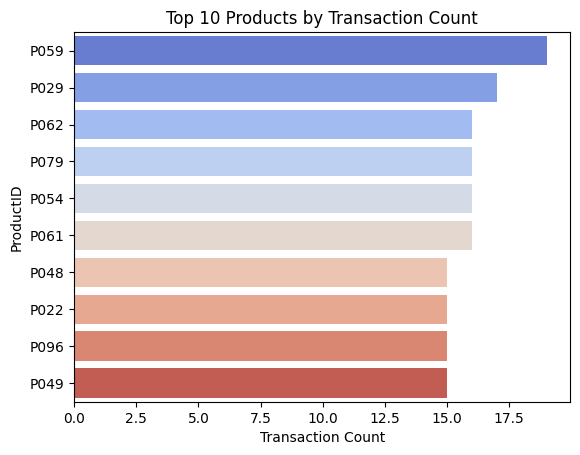

In [16]:
top_products = (transactions_df["ProductID"].value_counts().head(10).rename_axis("ProductID").reset_index(name="Count"))

top_products_visual = sns.barplot(x="Count", y="ProductID", data=top_products, palette="coolwarm")

plt.title("Top 10 Products by Transaction Count")
plt.xlabel("Transaction Count")
plt.ylabel("ProductID")
plt.show()

**Top 10 Products by Transaction Count:**

  - Products such as P059 and P029 have significantly higher transaction counts compared to others.
  - These products likely represent the best-sellers, which may be due to pricing, quality, or demand in the market.

### Distribution of product prices

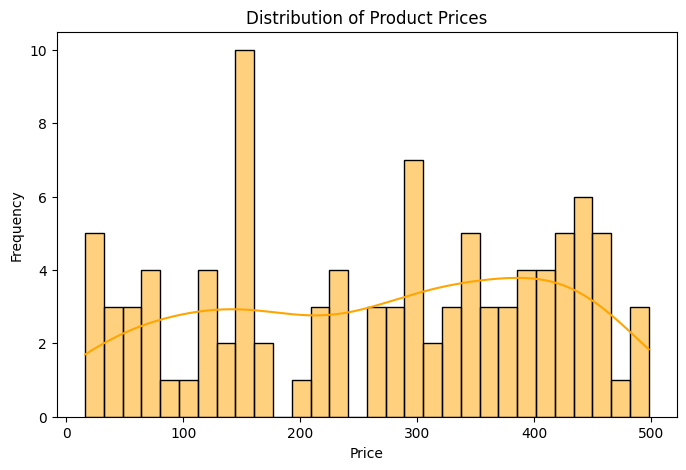

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(products_df['Price'], bins=30, kde=True, color='orange')
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()



**Distribution of Product Prices:**

   - The distribution shows a wide range of product prices, with a noticeable peak around 200.
   - The varying price points indicate that the business caters to diverse customer segments with different purchasing power.

### Distribution of total transaction value

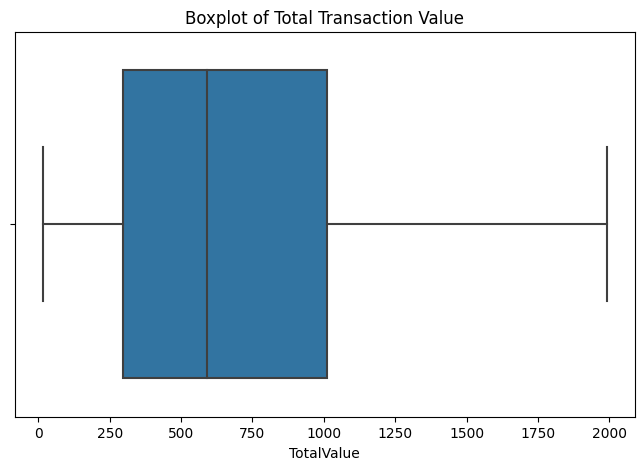

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=transactions_df['TotalValue'])
plt.title("Boxplot of Total Transaction Value")
plt.show()


**Boxplot of Total Transaction Value:**

- Most transactions range between $250 and $1000, with a median value around $750.
- There are no extreme outliers, suggesting a consistent transaction pattern among customers.

### Examine Relationships between two variables

### 


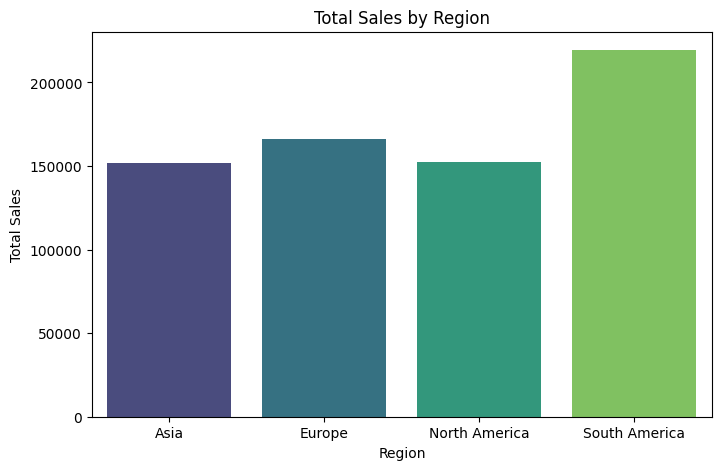

In [19]:

# Bivariate Analysis
# -------------------

transactions_customers = transactions_df.merge(customers_df, on="CustomerID")
region_sales = transactions_customers.groupby("Region")["TotalValue"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=region_sales, x="Region", y="TotalValue", palette="viridis")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


**Observations:**

- South America has the highest total sales among the regions.
- Europe comes in second place in terms of total sales.
- Asia and North America have similar total sales, with Asia slightly lower.
- Highlights the relatively close sales figures between Asia and North America.

### Heatmap of product category vs region sales

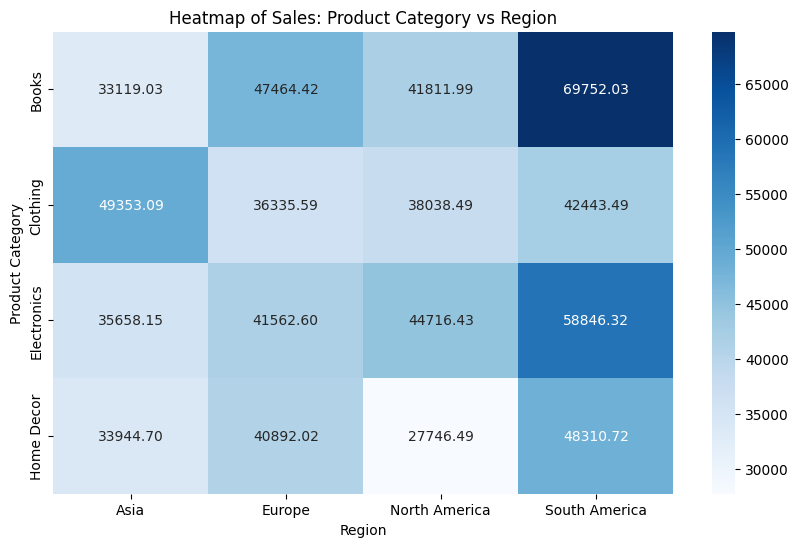

In [20]:
# Example: 
merged_data = transactions_products.merge(customers_df, on="CustomerID")
category_region_sales = merged_data.groupby(["Category", "Region"])["TotalValue"].sum().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(category_region_sales, annot=True, fmt=".2f", cmap="Blues")
plt.title("Heatmap of Sales: Product Category vs Region")
plt.xlabel("Region")
plt.ylabel("Product Category")
plt.show()


**Observations:**

- South America is the highest-performing region in terms of sales.
- Books are the highest-selling product category overall.
- Home Decor is the lowest-selling product category.